# Check correlation between displacement data and the SMEB total price

- SMEB data: /Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/05.cockpit/cockpit_file_agg_naintrap_change.csv
- Target for the correlation is the column delta_Price_SMEB_total_sanswater


- Displacement data: /Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/01.IMPACT_Data/movement_monitoring/04.feature_eng.displacement.csv

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
from datetime import datetime
import seaborn as sns
%matplotlib inline

## Load data

In [29]:
# import SMEB
fname = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/05.cockpit/cockpit_file_agg_naintrap_change.csv'
data_smeb = pd.read_csv(fname, index_col=0)
# select columns to keep 
cols = ['q_sbd', 'q_gov','q_district','month', 'delta_Price_SMEB_total_sanswater']
data_smeb = data_smeb[cols]
# data_smeb.head()

# import displacement
fname = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/01.IMPACT_Data/movement_monitoring/04.feature_eng.displacement.csv'
data_IDP = pd.read_csv(fname, index_col=0)
# select columns to keep 
# print(data_IDP.columns)
cols = ['q_sbd', 'q_gov', 'q_district','month', 'inc_min_IDPs_sum',
 'inc_max_IDPs_sum',
 'inc_min_pre_conf_pop_remained_mean',
 'inc_max_pre_conf_pop_remained_mean',
 'delta_rel_min_IDPs_sum',
 'delta_rel_max_IDPs_sum',
 'delta_abs_min_pre_conf_pop_remained_mean',
 'delta_abs_max_pre_conf_pop_remained_mean']
data_IDP = data_IDP[cols]
# data_IDP.head()

# join the data based on the smeb data
data = data_smeb.merge(data_IDP, left_on=['q_sbd','month','q_gov','q_district'], right_on = ['q_sbd','month','q_gov','q_district'], how='left')
assert data.shape[0] == data_smeb.shape[0]
data

q_sbd q_gov q_district  month  delta_Price_SMEB_total_sanswater  \
0     SY020001  SY02     SY0200      1                               NaN   
1     SY020001  SY02     SY0200      2                         -0.015281   
2     SY020001  SY02     SY0200      3                         -0.031919   
3     SY020001  SY02     SY0200      4                          0.068480   
4     SY020001  SY02     SY0200      5                          0.154847   
...        ...   ...        ...    ...                               ...   
1821  SY110302  SY11     SY1103     18                          0.031808   
1822  SY110302  SY11     SY1103     19                          0.004354   
1823  SY110302  SY11     SY1103     20                         -0.077617   
1824  SY110302  SY11     SY1103     21                          0.077785   
1825  SY110302  SY11     SY1103     22                          0.043846   

     inc_min_IDPs_sum inc_max_IDPs_sum inc_min_pre_conf_pop_remained_mean  \
0                 NaN              NaN                                NaN   
1                 NaN              NaN                                NaN   
2                 NaN              NaN                                NaN   
3                 NaN              NaN                                NaN   
4                 NaN              NaN                                NaN   
...               ...              ...                                ...   
1821            False            False                              False   
1822            False            False                              False   
1823              NaN              NaN                                NaN   
1824              NaN              NaN                                NaN   
1825            False            False                              False   

     inc_max_pre_conf_pop_remained_mean  delta_rel_min_IDPs_sum  \
0                                   NaN                     NaN   
1                                   NaN                     NaN   
2                                   NaN                     NaN   
3                                   NaN                     NaN   
4                                   NaN                     NaN   
...                                 ...                     ...   
1821                              False                0.000000   
1822                              False               -0.100000   
1823                                NaN                     NaN   
1824                                NaN                     NaN   
1825                              False               -0.074074   

      delta_rel_max_IDPs_sum  delta_abs_min_pre_conf_pop_remained_mean  \
0                        NaN                                       NaN   
1                        NaN                                       NaN   
2                        NaN                                       NaN   
3                        NaN                                       NaN   
4                        NaN                                       NaN   
...                      ...                                       ...   
1821                   0.000                                       0.0   
1822                  -0.125                                       0.0   
1823                     NaN                                       NaN   
1824                     NaN                                       NaN   
1825                   0.000                                       0.0   

      delta_abs_max_pre_conf_pop_remained_mean  
0                                          NaN  
1                                          NaN  
2                                          NaN  
3                                          NaN  
4                                          NaN  
...                                        ...  
1821                                       0.0  
1822                                       0.0  
1823                                

In [19]:
data[data['q_gov']=='SY05'].corr(method ='pearson').loc[:,'delta_Price_SMEB_total_sanswater']

month                                       0.178655
delta_Price_SMEB_total_sanswater            1.000000
delta_rel_min_IDPs_sum                      0.403678
delta_rel_max_IDPs_sum                      0.378588
delta_abs_min_pre_conf_pop_remained_mean    0.047857
delta_abs_max_pre_conf_pop_remained_mean    0.047857
Name: delta_Price_SMEB_total_sanswater, dtype: float64

## Correlation matrix

SY02 184
delta_rel_max_IDPs_sum                      0.104386
delta_abs_max_pre_conf_pop_remained_mean   -0.054753
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


nan 0
delta_rel_max_IDPs_sum                     NaN
delta_abs_max_pre_conf_pop_remained_mean   NaN
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


SY05 54
delta_rel_max_IDPs_sum                      0.378588
delta_abs_max_pre_conf_pop_remained_mean    0.047857
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


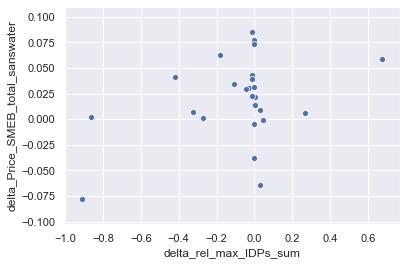

SY07 335
delta_rel_max_IDPs_sum                     -0.041899
delta_abs_max_pre_conf_pop_remained_mean   -0.126309
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


SY08 111
delta_rel_max_IDPs_sum                     -0.115898
delta_abs_max_pre_conf_pop_remained_mean         NaN
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


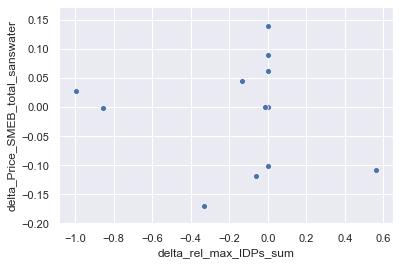

SY09 46
delta_rel_max_IDPs_sum                     -0.115064
delta_abs_max_pre_conf_pop_remained_mean   -0.064296
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


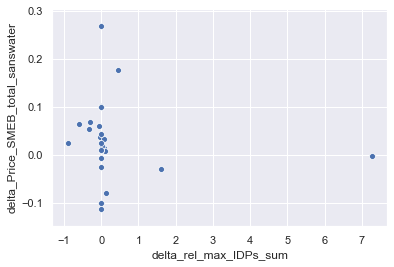

SY11 156
delta_rel_max_IDPs_sum                      0.100747
delta_abs_max_pre_conf_pop_remained_mean    0.011189
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


In [33]:
# governorate1
sns.set()
govs = data['q_gov'].unique()
for gov in govs:
    this_data = data[data['q_gov']==gov]
    cols = ['delta_rel_max_IDPs_sum', 'delta_abs_max_pre_conf_pop_remained_mean']
    sns.scatterplot(x='delta_rel_max_IDPs_sum', y='delta_Price_SMEB_total_sanswater', data=this_data)
    print(gov, len(this_data))
    print(this_data.corr(method ='pearson').loc[cols,'delta_Price_SMEB_total_sanswater'])
    print(' ')

    plt.show()


District: SY0200, length: 48
delta_rel_max_IDPs_sum                      0.087166
delta_abs_max_pre_conf_pop_remained_mean   -0.115782
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


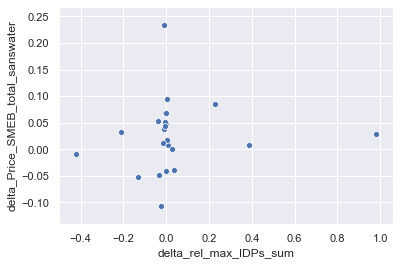

District: nan, length: 0
delta_rel_max_IDPs_sum                     NaN
delta_abs_max_pre_conf_pop_remained_mean   NaN
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


District: SY0202, length: 17
delta_rel_max_IDPs_sum                     -0.252811
delta_abs_max_pre_conf_pop_remained_mean   -0.110771
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


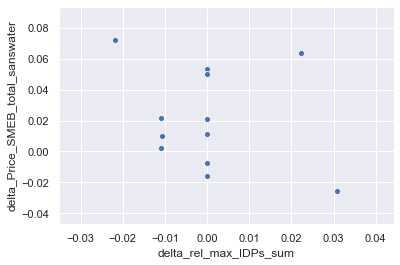

District: SY0203, length: 35
delta_rel_max_IDPs_sum                      0.285171
delta_abs_max_pre_conf_pop_remained_mean    0.244512
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


District: SY0204, length: 44
delta_rel_max_IDPs_sum                      0.135967
delta_abs_max_pre_conf_pop_remained_mean   -0.155514
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


District: SY0205, length: 2
delta_rel_max_IDPs_sum                     NaN
delta_abs_max_pre_conf_pop_remained_mean   NaN
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


District: SY0206, length: 22
delta_rel_max_IDPs_sum                      0.284481
delta_abs_max_pre_conf_pop_remained_mean    0.080392
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


District: SY0208, length: 16
delta_rel_max_IDPs_sum                     -0.217968
delta_abs_max_pre_conf_pop_remained_mean         NaN
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


District: SY0501, length: 10
delta_rel_max_IDPs_sum                      0.778115
delta_abs_max_pre_conf_pop_remained_mean   -0.381085
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


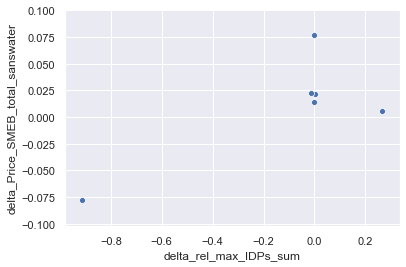

District: SY0502, length: 41
delta_rel_max_IDPs_sum                      0.161980
delta_abs_max_pre_conf_pop_remained_mean    0.362207
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


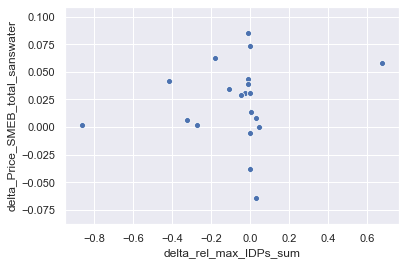

District: SY0505, length: 3
delta_rel_max_IDPs_sum                     NaN
delta_abs_max_pre_conf_pop_remained_mean   NaN
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


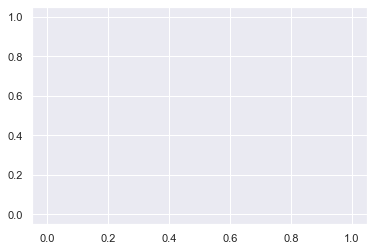

District: SY0700, length: 94
delta_rel_max_IDPs_sum                      0.047309
delta_abs_max_pre_conf_pop_remained_mean   -0.240870
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


District: SY0702, length: 59
delta_rel_max_IDPs_sum                     -0.225721
delta_abs_max_pre_conf_pop_remained_mean   -0.291635
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


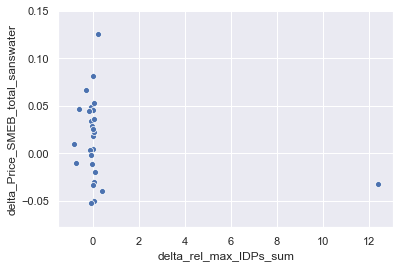

District: SY0703, length: 87
delta_rel_max_IDPs_sum                      0.215713
delta_abs_max_pre_conf_pop_remained_mean    0.053521
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


District: SY0704, length: 50
delta_rel_max_IDPs_sum                      0.136641
delta_abs_max_pre_conf_pop_remained_mean         NaN
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


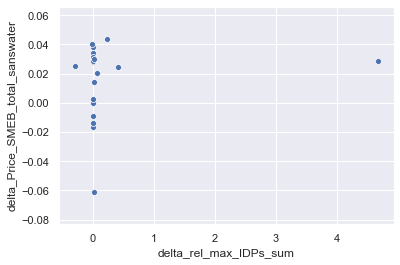

District: SY0705, length: 45
delta_rel_max_IDPs_sum                     -0.273317
delta_abs_max_pre_conf_pop_remained_mean   -0.043193
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


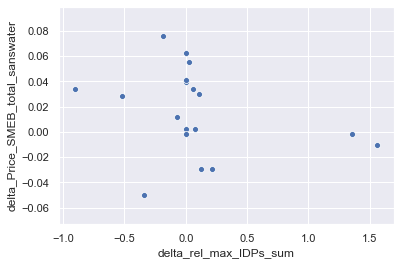

District: SY0800, length: 54
delta_rel_max_IDPs_sum                     NaN
delta_abs_max_pre_conf_pop_remained_mean   NaN
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


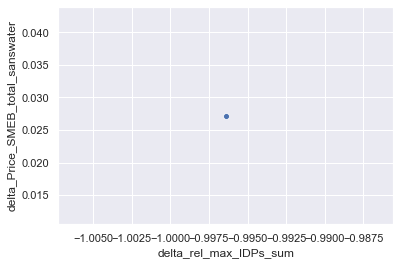

District: SY0802, length: 27
delta_rel_max_IDPs_sum                      0.14578
delta_abs_max_pre_conf_pop_remained_mean        NaN
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


District: SY0803, length: 26
delta_rel_max_IDPs_sum                     NaN
delta_abs_max_pre_conf_pop_remained_mean   NaN
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


District: SY0804, length: 4
delta_rel_max_IDPs_sum                      1.0
delta_abs_max_pre_conf_pop_remained_mean    NaN
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


District: SY0901, length: 40
delta_rel_max_IDPs_sum                     -0.124437
delta_abs_max_pre_conf_pop_remained_mean    0.041634
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


District: SY0902, length: 3
delta_rel_max_IDPs_sum                     NaN
delta_abs_max_pre_conf_pop_remained_mean   NaN
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


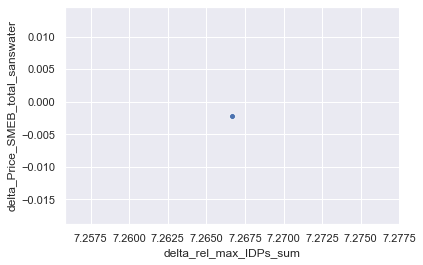

District: SY0903, length: 3
delta_rel_max_IDPs_sum                     NaN
delta_abs_max_pre_conf_pop_remained_mean   NaN
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


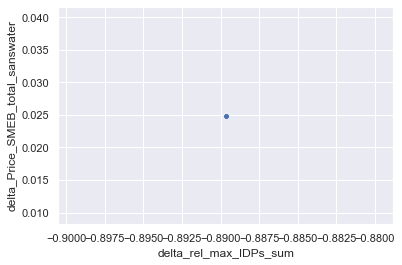

District: SY1101, length: 37
delta_rel_max_IDPs_sum                      0.110547
delta_abs_max_pre_conf_pop_remained_mean    0.310984
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


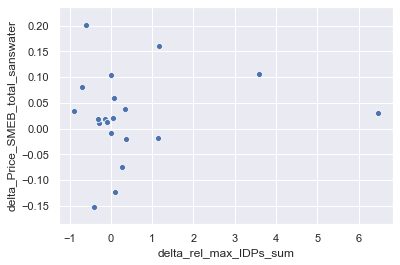

District: SY1102, length: 63
delta_rel_max_IDPs_sum                      0.285455
delta_abs_max_pre_conf_pop_remained_mean   -0.133792
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


District: SY1103, length: 56
delta_rel_max_IDPs_sum                     -0.130249
delta_abs_max_pre_conf_pop_remained_mean    0.001884
Name: delta_Price_SMEB_total_sanswater, dtype: float64
 


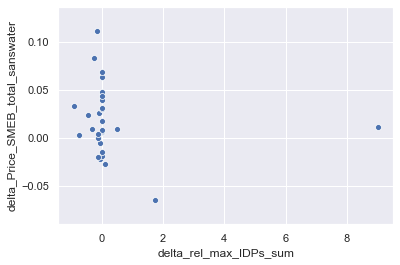

In [32]:
# district
districts = data['q_district'].unique()
cols = ['delta_rel_max_IDPs_sum', 'delta_abs_max_pre_conf_pop_remained_mean']

for d in districts:
    df = data[data['q_district'] == d]
    print(f'District: {d}, length: {len(df)}')  
    sns.scatterplot(x='delta_rel_max_IDPs_sum', y='delta_Price_SMEB_total_sanswater', data=df)
    print(df.corr(method ='pearson').loc[cols,'delta_Price_SMEB_total_sanswater'])
    print(' ')
    plt.show()

In [22]:
data[data['q_district']=='SY0501']

q_sbd q_gov q_district  month  delta_Price_SMEB_total_sanswater  \
474  SY050101  SY05     SY0501     13                               NaN   
475  SY050101  SY05     SY0501     14                          0.021317   
476  SY050101  SY05     SY0501     15                          0.022641   
477  SY050101  SY05     SY0501     16                          0.006036   
478  SY050101  SY05     SY0501     17                          0.076828   
479  SY050101  SY05     SY0501     18                          0.013765   
480  SY050101  SY05     SY0501     19                         -0.077899   
481  SY050101  SY05     SY0501     20                         -0.007318   
482  SY050101  SY05     SY0501     21                         -0.009218   
483  SY050101  SY05     SY0501     22                          0.085909   

    inc_min_IDPs_sum inc_max_IDPs_sum inc_min_pre_conf_pop_remained_mean  \
474            False            False                               True   
475             True             True                              False   
476            False            False                               True   
477             True             True                              False   
478            False            False                              False   
479            False            False                              False   
480            False            False                               True   
481              NaN              NaN                                NaN   
482              NaN              NaN                                NaN   
483              NaN              NaN                                NaN   

    inc_max_pre_conf_pop_remained_mean  delta_rel_min_IDPs_sum  \
474                               True                0.000000   
475                              False                0.001686   
476                               True               -0.016835   
477                              False                0.267123   
478                              False                0.000000   
479                              False                0.000000   
480                               True               -0.913514   
481                                NaN                     NaN   
482                                NaN                     NaN   
483                                NaN                     NaN   

     delta_rel_max_IDPs_sum  delta_abs_min_pre_conf_pop_remained_mean  \
474                0.000000                                      25.0   
475                0.001675                                       0.0   
476               -0.013378                                      25.0   
477                0.264407                                     -25.0   
478                0.000000                                       0.0   
479                0.000000                                       0.0   
480               -0.911528                                      25.0   
481                     NaN                                       NaN   
482                     NaN                                       NaN   
483                     NaN                                       NaN   

     delta_abs_max_pre_conf_pop_remained_mean  
474                                      25.0  
475                                       0.0  
476                                      25.0  
477                                     -25.0  
478                                       0.0  
479                                       0.0  
480                                      25.0  
481                                       NaN  
482                                       NaN  
483                                       NaN

# VIF Variance Inflation Factor


In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def sklearn_vif(exogs, data):

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # form input data for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]

        # extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

In [8]:
df = sns.load_dataset('car_crashes')
exogs = ['alcohol', 'speeding', 'no_previous', 'not_distracted']
sklearn_vif(exogs=exogs, data=df)

VIF  Tolerance
alcohol         3.436072   0.291030
speeding        1.884340   0.530690
no_previous     3.113984   0.321132
not_distracted  2.668456   0.374749

In [9]:
cols = ['delta_Price_SMEB_total_sanswater', 
         'delta_rel_min_IDPs_sum',
         'delta_rel_max_IDPs_sum',
         'delta_abs_min_pre_conf_pop_remained_mean',
         'delta_abs_max_pre_conf_pop_remained_mean']
my_data = data[cols]
my_data = my_data.fillna(0)
exogs = [
         'delta_rel_min_IDPs_sum',

         'delta_abs_min_pre_conf_pop_remained_mean']
sklearn_vif(exogs=exogs, data=my_data)

VIF  Tolerance
delta_rel_min_IDPs_sum                    1.000456   0.999544
delta_abs_min_pre_conf_pop_remained_mean  1.000456   0.999544